In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials as yfs

%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7) 

In [82]:
buy_ticker = "XLY"
sell_ticker = "XLC"
beta_ticker = yf.Ticker("SPY")

ticker1 = yf.Ticker(buy_ticker)
ticker2 = yf.Ticker(sell_ticker)
dataFrame1 = ticker1.history(
    start='2012-1-1', actions=False, rounding=True)
dataFrame2 = ticker2.history(
    start='2012-1-1', actions=False, rounding=True)
spy = beta_ticker.history(
    start='2012-1-1', actions=False, rounding=True)

ratio = dataFrame1.Close / dataFrame2.Close
spread = dataFrame1.Close - dataFrame2.Close


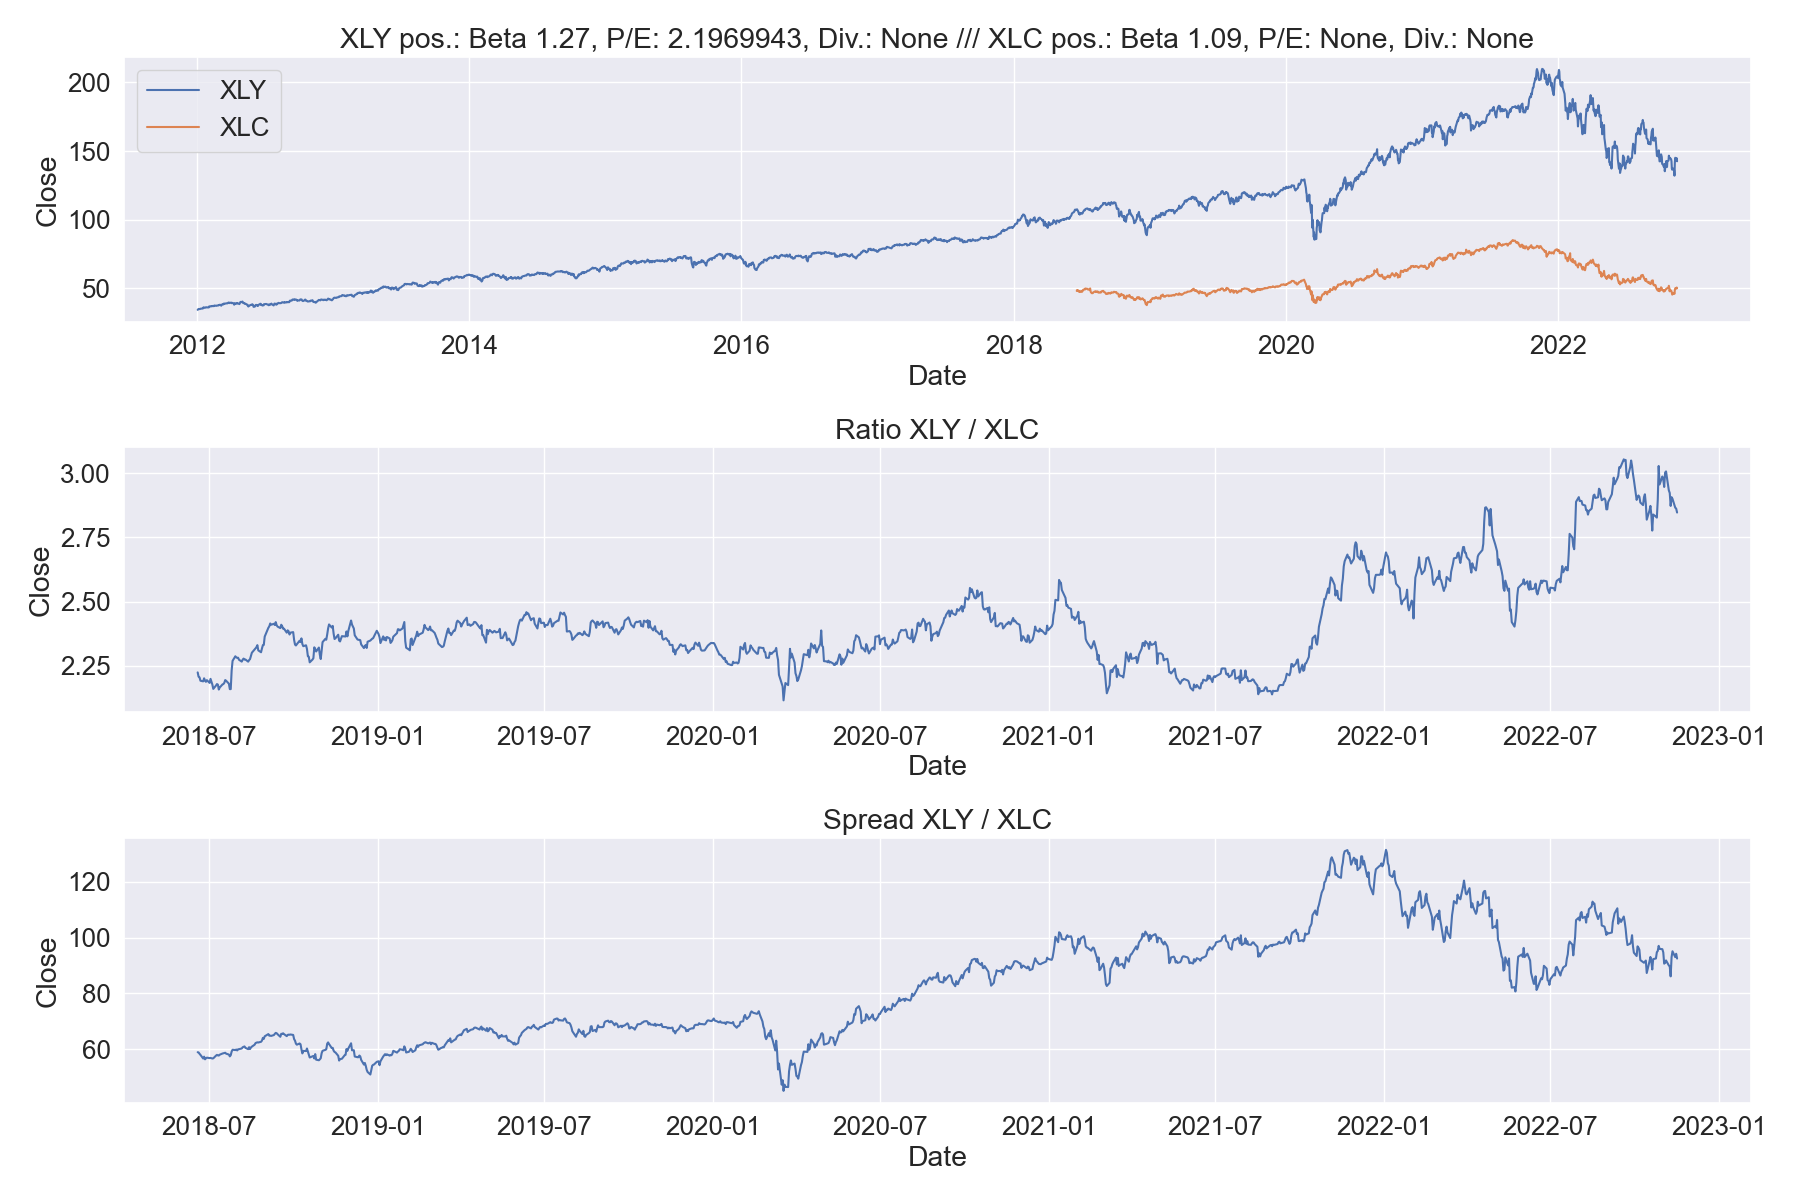

In [83]:
# Long ticker:
long_p_e = yfs(buy_ticker).get_pe_ratio()
long_div = yfs(buy_ticker).get_dividend_yield()

# ATR
spy_ticker1 = pd.concat(
    [spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
spy_ticker1.columns = ["SPY", buy_ticker]
long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
ticker1_cov = long_data_pct.cov().iloc[0, 1]
ticker1_var = long_data_pct["SPY"].var()
long_beta = np.round(ticker1_cov/ticker1_var,2)

# Short ticker:
short_p_e = yfs(sell_ticker).get_pe_ratio()
short_div = yfs(sell_ticker).get_dividend_yield()

# ATR
spy_ticker2 = pd.concat(
    [spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
spy_ticker2.columns = ["SPY", sell_ticker]
short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
ticker2_cov = short_data_pct.cov().iloc[0, 1]
ticker2_var = short_data_pct["SPY"].var()
short_beta = np.round(ticker2_cov/ticker2_var, 2)

# CHART
chart = fig, axes = plt.subplots(3, figsize=(18, 12))
axes[0].set_title(
    f"{buy_ticker} pos.: Beta {long_beta}, P/E: {long_p_e}, Div.: {long_div} /// {sell_ticker} pos.: Beta {short_beta}, P/E: {short_p_e}, Div.: {short_div}")
sns.lineplot(data=dataFrame1, x="Date", y="Close",
             ax=axes[0], label=buy_ticker)
sns.lineplot(data=dataFrame2, x="Date", y="Close",
             ax=axes[0], label=sell_ticker)
axes[1].set_title(f"Ratio {buy_ticker} / {sell_ticker}")
sns.lineplot(data=ratio, ax=axes[1])
axes[2].set_title(f"Spread {buy_ticker} / {sell_ticker}")
sns.lineplot(data=spread, ax=axes[2])
plt.tight_layout(pad=1)